In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chino\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv("IMDB_dataset.csv")

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [6]:
print(data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


In [8]:
data.dropna(inplace=True)

In [9]:
def clean_review(review):
    str =' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    # Convert to lower case
    review = review.lower()
    
    # Remove special characters
    review = re.sub(r'\W', ' ', review)
    
    # Remove single characters
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review)
    
    # Remove single characters from the start
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)
    
    # Substituting multiple spaces with single space
    review = re.sub(r'\s+', ' ', review, flags=re.I)
    
    # Remove stopwords and lemmatize
    review = ' '.join([lemmatizer.lemmatize(word) for word in review.split() if word not in stop_words])
    
    return review

In [11]:
from wordcloud import WordCloud

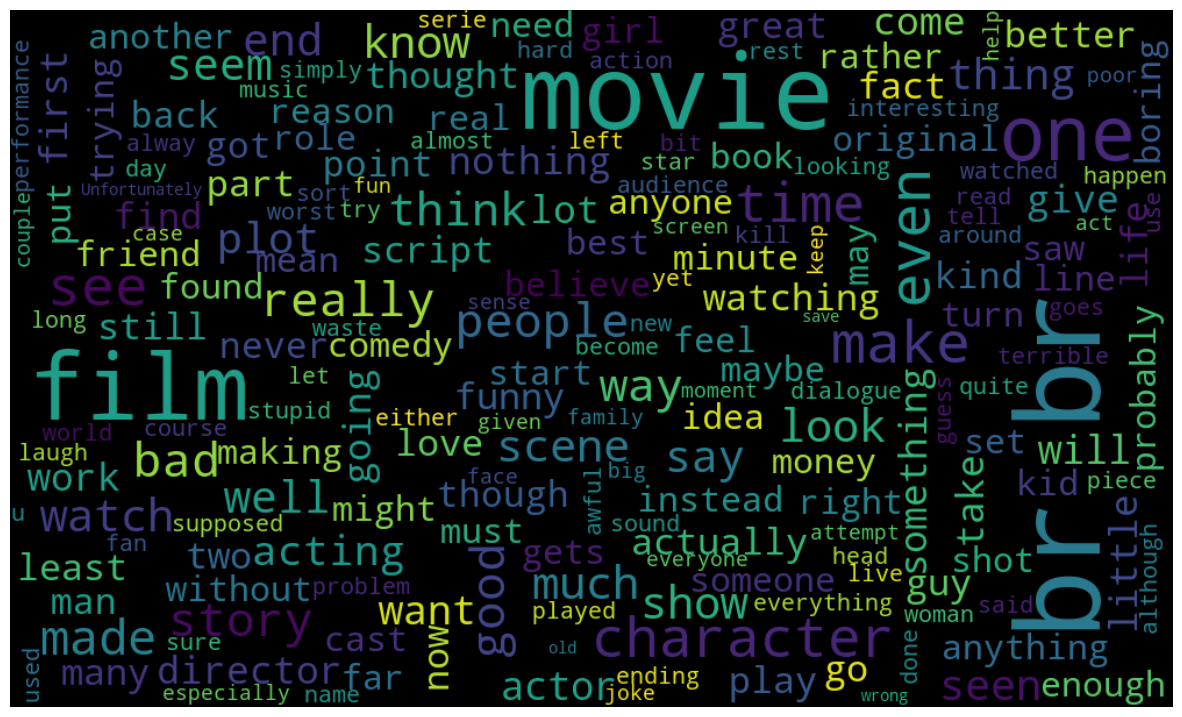

In [12]:
#draw worldcloud
# Combine all negative reviews into a single string
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))

# Create and generate the word cloud image
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Plotting the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()


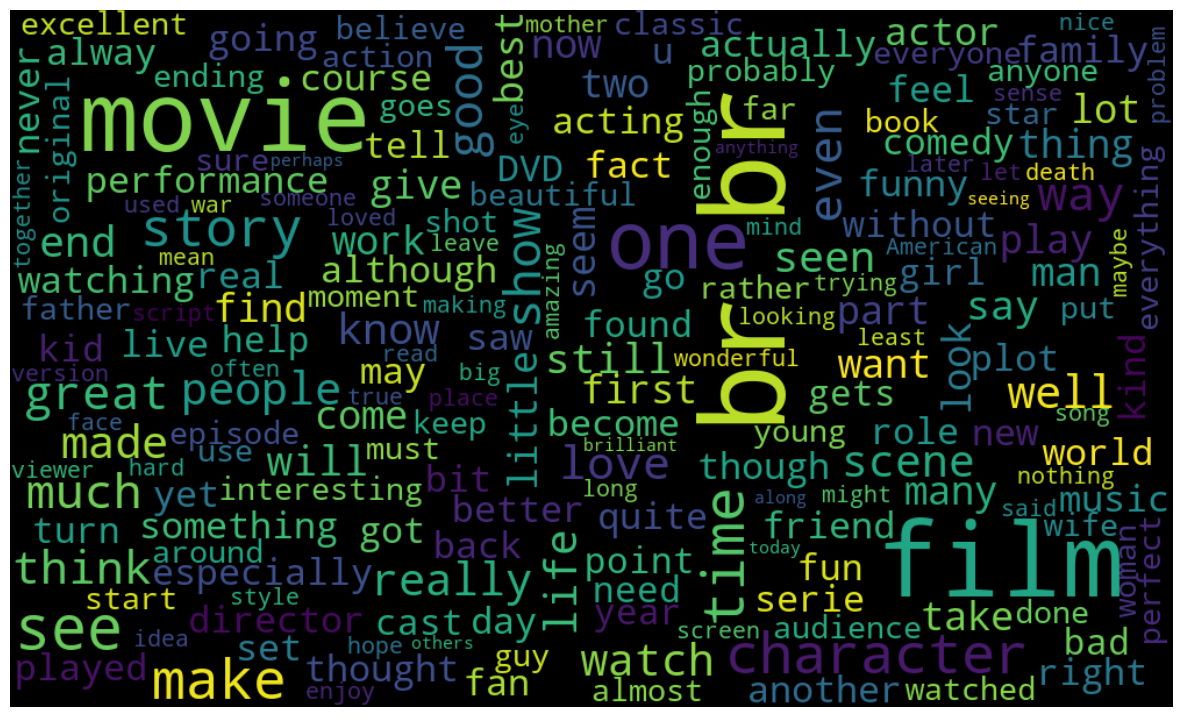

In [13]:
#draw worldcloud
# Combine all negative reviews into a single string
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))

# Create and generate the word cloud image
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Plotting the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()


In [14]:
# Split Data
X = data['review']
y = data['sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Convert labels to binary values (positive=1, negative=0)
y = y.map({'positive': 1, 'negative': 0})

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [17]:
# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_vect, y_train)
y_pred_nb = nb.predict(X_test_vect)

print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier
Accuracy: 0.8652
[[4348  613]
 [ 735 4304]]
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)
y_pred_rf = rf.predict(X_test_vect)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.8568
[[4298  663]
 [ 769 4270]]
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [37]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
y_pred_lr = lr_model.predict(X_test_vect)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.8942
[[4351  610]
 [ 448 4591]]
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [20]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_vect, y_train)
y_pred_dt = dt.predict(X_test_vect)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy: 0.7265
[[3635 1326]
 [1409 3630]]
              precision    recall  f1-score   support

    negative       0.72      0.73      0.73      4961
    positive       0.73      0.72      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [21]:
# XGBoost Classifier
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_vect, y_train_encoded)
y_pred_xgb = xgb.predict(X_test_vect)

# Convert numerical predictions back to original labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_labels))
print(confusion_matrix(y_test, y_pred_xgb_labels))
print(classification_report(y_test, y_pred_xgb_labels))


XGBoost Classifier
Accuracy: 0.8584
[[4144  817]
 [ 599 4440]]
              precision    recall  f1-score   support

    negative       0.87      0.84      0.85      4961
    positive       0.84      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [38]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vect, y_train)
y_pred_knn = knn.predict(X_test_vect)

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy: 0.7763
[[3715 1246]
 [ 991 4048]]
              precision    recall  f1-score   support

    negative       0.79      0.75      0.77      4961
    positive       0.76      0.80      0.78      5039

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [40]:
# The most accurate model is Logistic Regression with an accuracy equal to: 
# Accuracy: 0.8942

In [41]:
import pickle as pk
pk.dump(lr_model,open('lr_model.pk','wb'))

In [42]:
def predict_sentiment(text, model, vectorizer):
    # Transform the input text using the same vectorizer used for training
    text_vect = vectorizer.transform([text])
    # Make a prediction
    prediction = lr_model.predict(text_vect)
    return prediction[0]

In [45]:
# Example new review
new_review = "I loved the movie, it was great!"

# Predict sentiment
sentiment = predict_sentiment(new_review, lr_model, vectorizer)
print(f"The sentiment of the review is: {sentiment}")


The sentiment of the review is: positive
